In [290]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [310]:
path = Path('./corona_data_sets') # use your path
all_files = list(path.rglob("*.csv"))

In [311]:
d = {}

for p in all_files:
    df = pd.read_csv(p, index_col=None, header=0, converters={'ags2': str, 'ags5': str})
    df = df.drop(['bundesland', 'kreis', '_id'], 1)
    d[p.stem] = df

In [312]:
d.keys()

dict_keys(['private_finanzen', 'verkehr', 'bevoelkerung', 'oeffentliche_finanzen', 'tourismus', 'pendler', 'krankenhausdaten', 'arbeitsmarktentwicklung', 'firmeninformationen', 'haushalte', 'erreichbarkeit', 'raumordnung', 'point_of_interest', 'genesene', 'ausbildungssituation', 'flaechennutzung', 'volkswirtschaftliche_gesamtrechnung', 'firmenveraenderungen'])

In [293]:
company_changes = d["firmenveraenderungen"]
filter_col = [col for col in company_changes if col.startswith('d20')]
company_changes["value"] = df[filter_col].mean(axis=1)
company_changes = company_changes.drop(filter_col, 1)
company_changes = company_changes.loc[company_changes['variable'] == 'kr_firm_loesch_m']
company_changes = company_changes.drop(['variable'], 1)
company_changes = company_changes[:-1]
d["firmenveraenderungen"] = company_changes

In [294]:
d.pop("genesene")

,ags2,ags5,variable,d20200301,d20200302,d20200303,d20200304,d20200305,d20200306,d20200307,...,d20210605,d20210606,d20210607,d20210608,d20210609,d20210610,d20210611,d20210612,d20210613,d20210614
0,01,01001,kr_gen_md,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,01,01002,kr_gen_md,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,01,01003,kr_gen_md,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
3,01,01004,kr_gen_md,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01,01051,kr_gen_md,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,16,16073,kr_gen_md_kum,0,0,0,0,0,0,0,...,6451,6451,6451,6451,6451,6452,6452,6452,6452,6452
798,16,16074,kr_gen_md_kum,0,0,0,0,0,0,0,...,4582,4582,4582,4582,4582,4582,4582,4582,4582,4582
799,16,16075,kr_gen_md_kum,0,1,1,1,1,1,1,...,6232,6232,6232,6233,6233,6233,6233,6233,6233,6233
800,16,16076,kr_gen_md_kum,0,0,0,0,0,0,0,...,7503,7503,7503,7503,7503,7503,7503,7503,7503,7503


In [295]:
{k: len(set(v["ags2"])) for k, v in d.items()}

{'private_finanzen': 16,
 'verkehr': 16,
 'bevoelkerung': 16,
 'oeffentliche_finanzen': 16,
 'tourismus': 16,
 'pendler': 16,
 'krankenhausdaten': 16,
 'arbeitsmarktentwicklung': 16,
 'firmeninformationen': 16,
 'haushalte': 16,
 'erreichbarkeit': 16,
 'raumordnung': 16,
 'point_of_interest': 16,
 'ausbildungssituation': 16,
 'flaechennutzung': 16,
 'volkswirtschaftliche_gesamtrechnung': 16,
 'firmenveraenderungen': 16}

In [296]:
{k: len(set(v["ags5"])) for k, v in d.items()}

{'private_finanzen': 401,
 'verkehr': 401,
 'bevoelkerung': 401,
 'oeffentliche_finanzen': 401,
 'tourismus': 401,
 'pendler': 401,
 'krankenhausdaten': 401,
 'arbeitsmarktentwicklung': 401,
 'firmeninformationen': 401,
 'haushalte': 401,
 'erreichbarkeit': 401,
 'raumordnung': 401,
 'point_of_interest': 401,
 'ausbildungssituation': 401,
 'flaechennutzung': 401,
 'volkswirtschaftliche_gesamtrechnung': 401,
 'firmenveraenderungen': 401}

In [308]:
df_final = reduce(lambda left,right: pd.merge(left,right,on=['ags2','ags5'], how = "outer"), d.values())
df_final.set_index('ags5', inplace=True, drop=True)

In [309]:
df_final

,ags2,kr_ein_md,kr_schu_qu,kr_hh_eink_kl1,kr_hh_eink_kl2,kr_hh_eink_kl3,kr_hh_eink_kl4,kr_hh_eink_kl5,kr_hh_eink_kl6,kr_kk_hh,...,kr_bws,kr_bws_bd,kr_bws_ld,kr_bws_ps_ant,kr_bws_sk_ant,kr_bws_ts_ant,kr_bws_ps_et,kr_bws_ss_et,kr_bws_ts_et,value
ags5,,,,,,,,,,,,,,,,,,,,,
01001,01,2986.0,16.0,13209.0,12385.0,13092.0,5441.0,3096.0,3497.0,34496.0,...,56.5,1.1,4.0,0.0,20.6,79.4,17.5,88.0,51.7,9.535714
01002,01,3304.0,12.1,22126.0,38523.0,39483.0,18567.0,11162.0,7841.0,35246.0,...,60.5,3.6,12.5,0.0,16.9,83.1,19.6,86.3,57.1,15.035714
01003,01,3036.0,15.1,22881.0,30159.0,32571.0,15805.0,10999.0,9039.0,37219.0,...,61.6,2.7,9.4,0.1,23.8,76.1,35.8,79.0,57.8,14.464286
01004,01,2842.0,17.9,7208.0,13291.0,10435.0,3812.0,3201.0,2805.0,38141.0,...,56.1,1.0,3.4,0.5,23.4,76.1,33.7,72.5,52.7,4.642857
01051,01,2914.0,12.8,11806.0,11575.0,17816.0,9873.0,7834.0,7676.0,46945.0,...,65.1,1.3,4.7,4.3,38.5,57.2,48.7,115.9,51.3,7.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9777,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9778,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
df = df_final
#X = df.drop(["ags5"], 1)
pca = PCA(n_components=3)

In [303]:
pca.fit(X)

PCA(n_components=3)

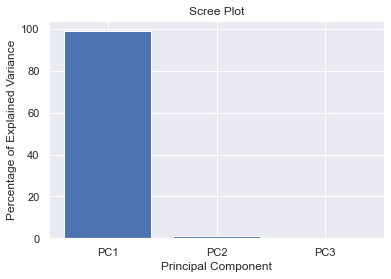

In [304]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

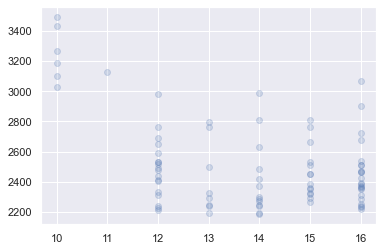

In [267]:
# plot data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)

(83, 568)
(83, 3)


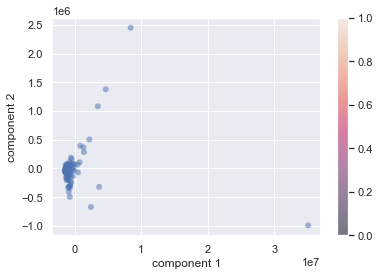

In [305]:
 projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
             edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [306]:
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2
0,-7.108149e+05,-495853.662778,-183844.352525
1,-8.936839e+05,63953.509891,31747.657898
2,-1.282334e+06,-82911.476960,-55522.588531
3,-1.196168e+06,-202989.931305,-114249.345939
4,-1.101653e+06,-78854.410491,-58567.632941
...,...,...,...
78,-1.067244e+06,-5183.394596,29797.505137
79,-1.188460e+06,28178.713736,31162.869493
80,-1.207097e+06,18872.619221,35860.975803
81,-1.386122e+06,-60380.016879,17870.494608


In [307]:
print(pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2','PC-3']))

              ags2  kr_ein_md    kr_schu_qu  kr_hh_eink_kl1  kr_hh_eink_kl2  \
PC-1 -9.656718e-08   0.000012  4.504447e-08        0.005051        0.008637   
PC-2 -1.261913e-07  -0.000244 -7.798893e-07       -0.018925       -0.029485   
PC-3  3.592695e-06   0.000557  9.674063e-07       -0.014089       -0.022063   

      kr_hh_eink_kl3  kr_hh_eink_kl4  kr_hh_eink_kl5  kr_hh_eink_kl6  \
PC-1        0.011681        0.008453        0.008122        0.006874   
PC-2       -0.041718       -0.027831       -0.026361       -0.022811   
PC-3       -0.074068       -0.010911       -0.007628       -0.006888   

      kr_kk_hh  ...        kr_bws  kr_bws_bd  kr_bws_ld  kr_bws_ps_ant  \
PC-1 -0.000079  ...  1.750098e-07   0.000001  -0.000002  -2.645734e-08   
PC-2  0.000009  ... -3.710248e-06  -0.000004   0.000008   1.539710e-06   
PC-3 -0.009032  ...  4.278422e-06  -0.000001  -0.000010  -1.369324e-06   

      kr_bws_sk_ant  kr_bws_ts_ant  kr_bws_ps_et  kr_bws_ss_et  kr_bws_ts_et  \
PC-1  -7.243665e-

Text(0, 0.5, 'PCA 2')

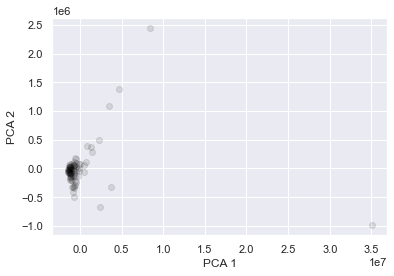

In [270]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

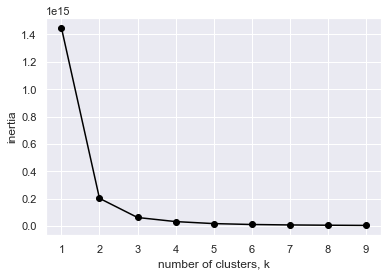

In [271]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [272]:
km = KMeans(n_clusters=3).fit(df)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_

In [273]:
cluster_map

,data_index,cluster
0,10041,0
1,10042,0
2,10043,0
3,10044,0
4,10045,0
...,...,...
78,16073,0
79,16074,0
80,16075,0
81,16076,0


0.1566265060240964